In [1]:
from IPython.core.display import HTML
with open('../style.css') as file:
    css = file.read()
HTML(css)

# The Fibonacci Numbers

The [Fibonacci numbers](https://en.wikipedia.org/wiki/Fibonacci_number) $F_n$ are defined by induction for all $n\in\mathbb{N}$:
  - $F_0 := 0$,
  - $F_1 := 1$, 
  - $F_{n+2} = F_{n+1} + F_n$ for all $n \in \mathbb{N}$.

Given a natural number `n`, the function `fibonacci(n)` computes the number $F_n$.

In [2]:
def fibonacci(n):
    if n <= 1:
        return n
    return fibonacci(n-1) + fibonacci(n-2)

In [3]:
[ (n,fibonacci(n)) for n in range(19) ]

[(0, 0),
 (1, 1),
 (2, 1),
 (3, 2),
 (4, 3),
 (5, 5),
 (6, 8),
 (7, 13),
 (8, 21),
 (9, 34),
 (10, 55),
 (11, 89),
 (12, 144),
 (13, 233),
 (14, 377),
 (15, 610),
 (16, 987),
 (17, 1597),
 (18, 2584)]

It seems that the *Fibonacci numbers* grow pretty fast. Let us plot these numbers to get a better understanding of their growth.

In [4]:
import matplotlib.pyplot as plt
import seaborn           as sns

Fontconfig warning: ignoring UTF-8: not a valid region tag


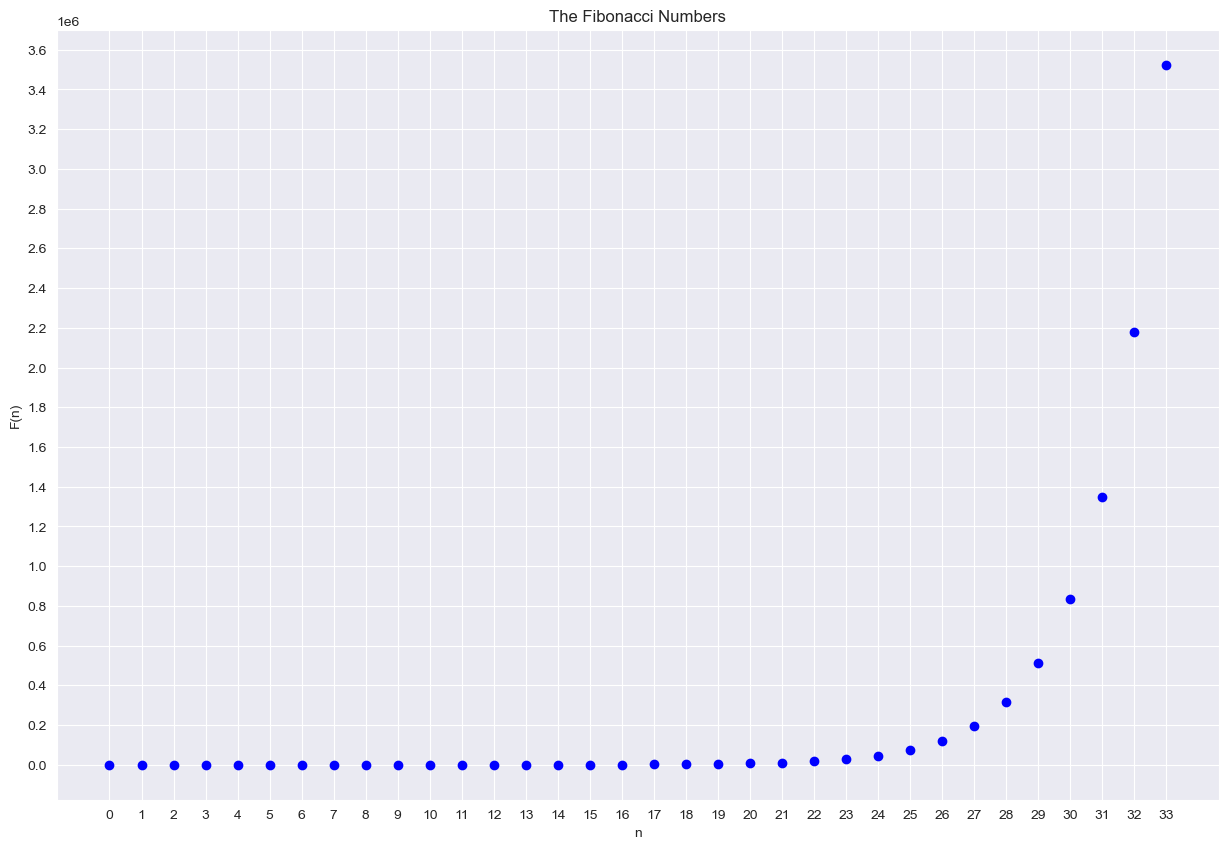

In [5]:
m = 34
X = []
Y = []
for n in range(m):
    X.append(n)
    Y.append(fibonacci(n))
sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
plt.plot(X, Y, 'bo')
plt.xticks(X)
plt.yticks([y * 2e5 for y in range(19)])
plt.xlabel('n')
plt.ylabel('F(n)')
plt.title('The Fibonacci Numbers')
plt.show()

It looks like the *Fibonacci numbers* grow exponentially.  Let us confirm this hypothesis by plotting the logarithm of these numbers.

In [6]:
import math

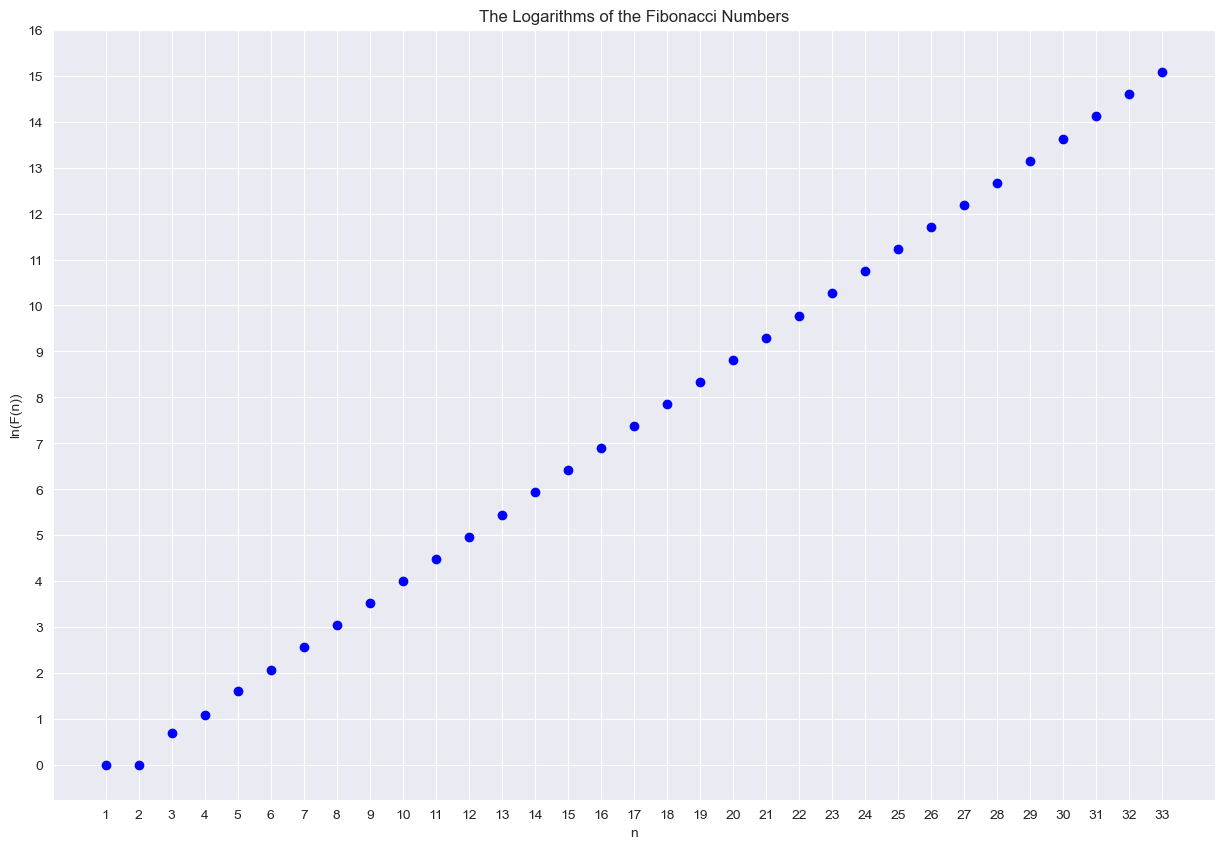

In [7]:
X = X[1:]
Y = Y[1:]
logY = [math.log(y) for y in Y]
sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
plt.plot(X, logY, 'bo') 
plt.xticks(X)
plt.yticks(list(range(17)))
plt.xlabel('n')
plt.ylabel('ln(F(n))')
plt.title('The Logarithms of the Fibonacci Numbers')
plt.show()

This plot looks linear and confirms our hypothesis that these numbers grow exponentially.

Computing the *Fibonacci numbers* took quite long.  Lets measure these times and plot them.

In [8]:
import time

In [10]:
x = 1 
y = 2
f'{x} + {y} = {x+y}'

'1 + 2 = 3'

fib(0) = 0
0.00033593177795410156
fib(1) = 1
5.9604644775390625e-06
fib(2) = 1
6.198883056640625e-06
fib(3) = 2
4.0531158447265625e-06
fib(4) = 3
5.0067901611328125e-06
fib(5) = 5
5.9604644775390625e-06
fib(6) = 8
6.9141387939453125e-06
fib(7) = 13
8.821487426757812e-06
fib(8) = 21
1.1682510375976562e-05
fib(9) = 34
1.621246337890625e-05
fib(10) = 55
2.4080276489257812e-05
fib(11) = 89
3.62396240234375e-05
fib(12) = 144
5.507469177246094e-05
fib(13) = 233
8.797645568847656e-05
fib(14) = 377
0.0001399517059326172
fib(15) = 610
0.00022292137145996094
fib(16) = 987
0.0003650188446044922
fib(17) = 1597
0.0005860328674316406
fib(18) = 2584
0.0009579658508300781
fib(19) = 4181
0.0015752315521240234
fib(20) = 6765
0.002958059310913086
fib(21) = 10946
0.0048980712890625
fib(22) = 17711
0.0075109004974365234
fib(23) = 28657
0.011858940124511719
fib(24) = 46368
0.01803112030029297
fib(25) = 75025
0.027446985244750977
fib(26) = 121393
0.03657341003417969
fib(27) = 196418
0.05620408058166504
fib(2

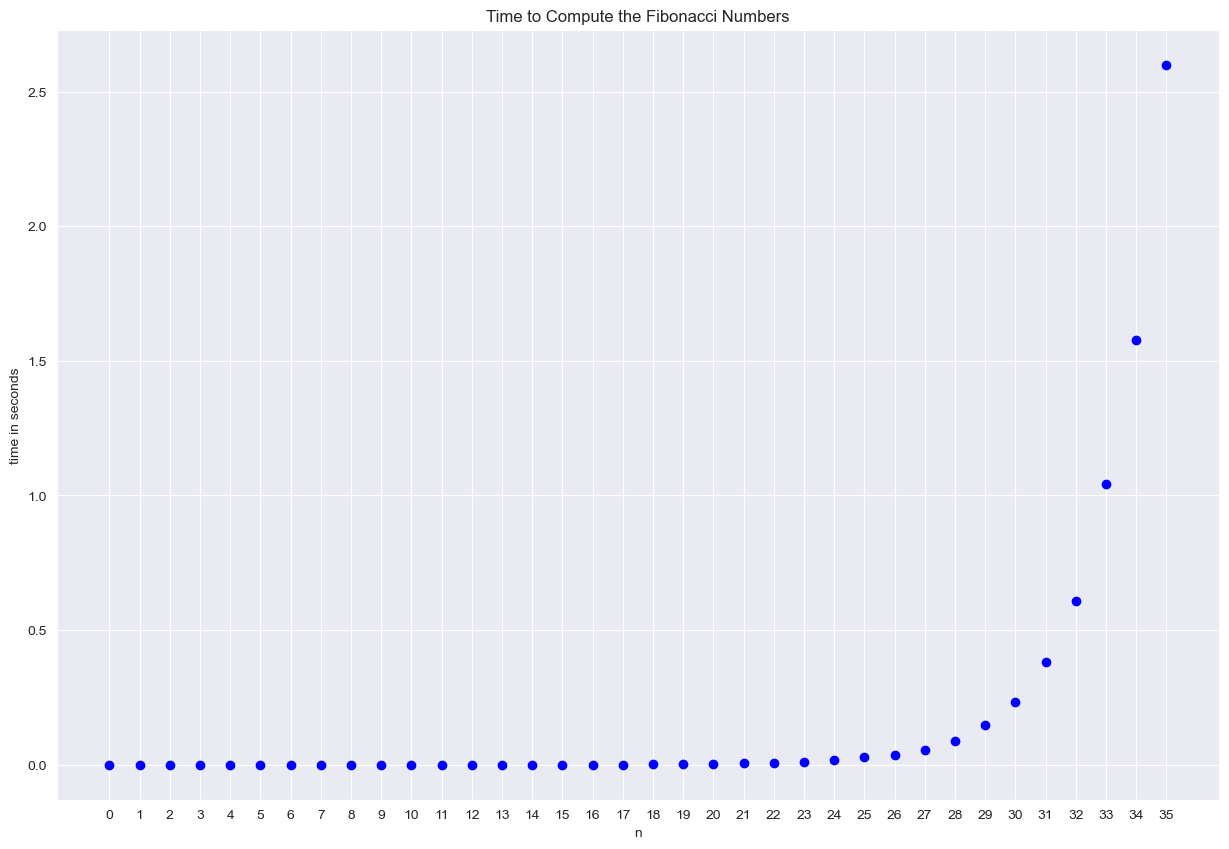

In [11]:
m = 36
Y = []
X = list(range(m))
for n in range(m):
    start = time.time()
    print(f'fib({n}) = {fibonacci(n)}')
    stop  = time.time()
    print(stop - start)
    Y.append(stop - start)
    
sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
plt.plot(X, Y, 'bo') 
plt.xticks(X)
plt.xlabel('n')
plt.ylabel('time in seconds')
plt.title('Time to Compute the Fibonacci Numbers')
plt.show()

The times seem to grow exponentially.  

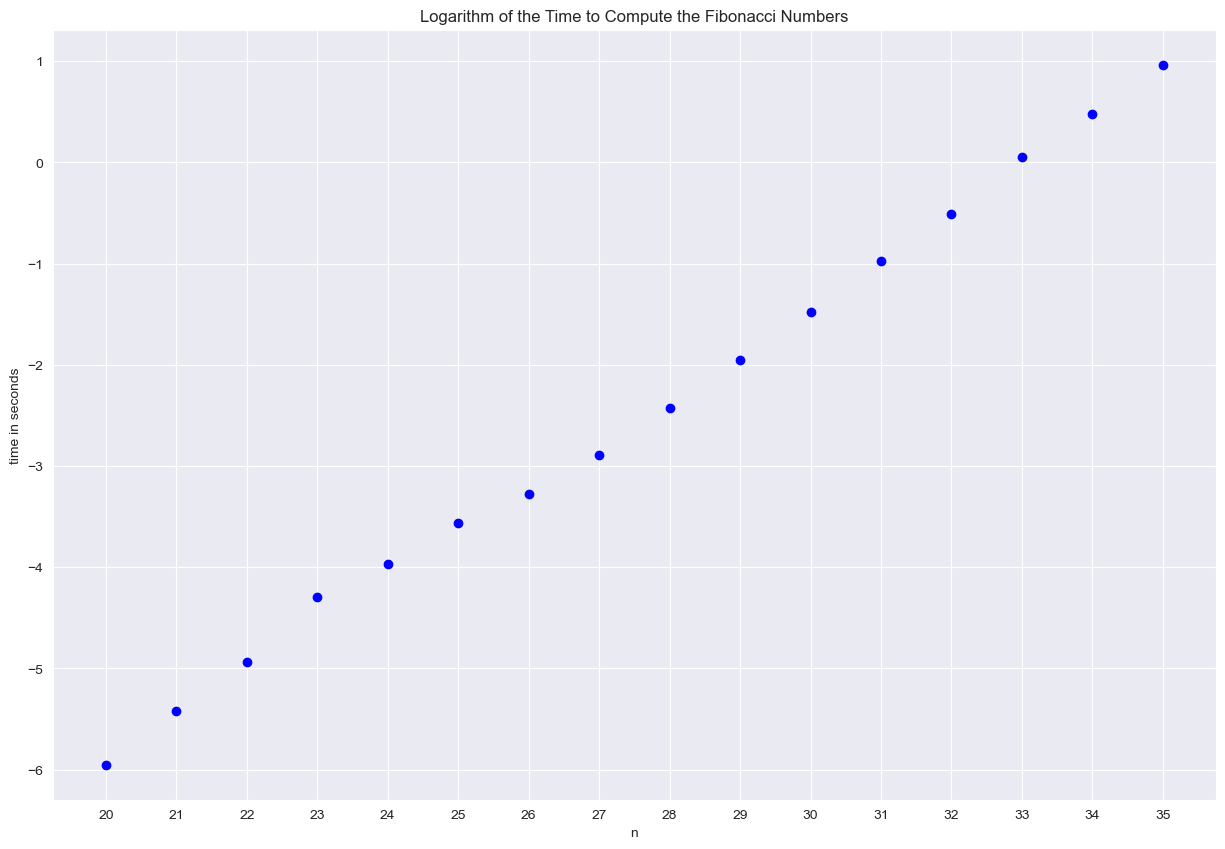

In [12]:
m = 36
Y = []
X = list(range(20, m))
for n in X:
    start = time.time()
    fibonacci(n)
    stop  = time.time()
    Y.append(math.log(stop - start))
    
sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
plt.plot(X, Y, 'bo') 
plt.xticks(X)
plt.xlabel('n')
plt.ylabel('time in seconds')
plt.title('Logarithm of the Time to Compute the Fibonacci Numbers')
plt.show()

The logarithmic plot confirms this.  In order to investigate the reason for this exponential growth, we compute the *computation tree*.  This tree shows the recursive invocations of the function.

In [13]:
import graphviz as gv

In [14]:
class ComputationTree:
    def __init__(self, arg, value, left=None, right=None):
        self.mArg   = arg
        self.mValue = value
        self.mLeft  = left
        self.mRight = right

In [15]:
def isLeaf(self):
    return self.mLeft == None and self.mRight == None

ComputationTree.isLeaf = isLeaf
del isLeaf

In [16]:
def toDot(self):
    ComputationTree.sCounter = 0 # static variable of the class ComputationTree
    dot = gv.Digraph(node_attr={'shape': 'record', 'style': 'rounded'})
    NodeDict = {}
    self._assignIDs(NodeDict)
    for n, t in NodeDict.items():
        dot.node(str(n), label='{' + str(t.mArg) + '|' + str(t.mValue) + '}')
        if t.mLeft != None and t.mRight != None:
            dot.edge(str(n), str(t.mLeft .mID))
            dot.edge(str(n), str(t.mRight.mID))
    return dot

ComputationTree.toDot = toDot
del toDot

In [17]:
def _assignIDs(self, NodeDict):
    ComputationTree.sCounter += 1
    self.mID = ComputationTree.sCounter
    NodeDict[self.mID] = self
    if self.isLeaf():
        return
    self.mLeft ._assignIDs(NodeDict)
    self.mRight._assignIDs(NodeDict)
    
ComputationTree._assignIDs = _assignIDs
del _assignIDs

In [18]:
def fibonacci_tree(n):
    if n <= 1:
        return ComputationTree(n, n)
    C1 = fibonacci_tree(n-1)
    C2 = fibonacci_tree(n-2)
    return ComputationTree(n, C1.mValue + C2.mValue, C1, C2)

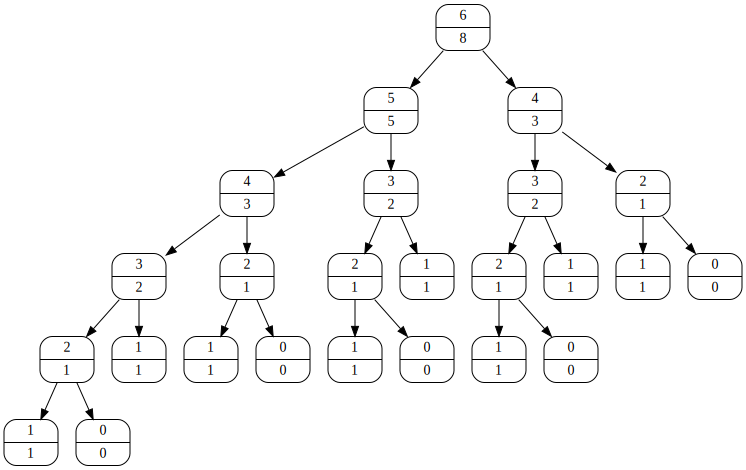

In [19]:
t = fibonacci_tree(6)
t.toDot()

The *computation tree* for the computation of `fibonacci(6)` shows the reason for the inefficiency:
* `fibonacci(5)` is computed once,
* `fibonacci(4)` is computed 2 times,
* `fibonacci(3)` is computed 3 times,
* `fibonacci(2)` is computed 5 times,
* `fibonacci(1)` is computed 8 times, and
* `fibonacci(0)` is computed 5 times.

If we want to compute the Fibonacci numbers efficiently, we must not compute the value `fibonacci(n)` for a given `n` more than once.  The easiest way to achieve this is by storing the Fibnacci numbers in a list `L`.  In the implementation below, `L[n]` stores the $n$-th Fibonacci number.

In [20]:
def fibonacci_mem(n):
    if n <= 1:
        return n
    L    = [0 for k in range(n+1)]
    L[0] = 0
    L[1] = 1
    for k in range(2, n+1):
        L[k] = L[k-1] + L[k-2]
    return L[n]

Now it is even possible to compute the $100,000^\mbox{th}$ *Fibonnaci number*.

In [21]:
%%time
x = fibonacci_mem(100000)

CPU times: user 286 ms, sys: 176 ms, total: 462 ms
Wall time: 462 ms


In [22]:
x

2597406934722172416615503402127591541488048538651769658472477070395253454351127368626555677283671674475463758722307443211163839947387509103096569738218830449305228763853133492135302679278956701051276578271635608073050532200243233114383986516137827238124777453778337299916214634050054669860390862750996639366409211890125271960172105060300350586894028558103675117658251368377438684936413457338834365158775425371912410500332195991330062204363035213756525421823998690848556374080179251761629391754963458558616300762819916081109836526352995440694284206571046044903805647136346033000520852277707554446794723709030979019014860432846819857961015951001850608264919234587313399150133919932363102301864172536477136266475080133982431231703431452964181790051187957316766834979901682011849907756686456845066287392485603914047605199550066288826345877189410680370091879365001733011710028310473947456256091444932821374855573864080579813028266640270354294412104919995803131876805899186513425175959911520563155337703996